In [107]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [108]:
# f_o2022 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2022.geojson"
f_o2022 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2022.gpkg"
f_o2021 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2021.gpkg"
f_o2020 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2020.gpkg"
f_o2019 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2019.gpkg"

In [109]:
orto_2022 = gpd.read_file(f_o2022)
orto_2021 = gpd.read_file(f_o2021)
orto_2020 = gpd.read_file(f_o2020)
orto_2019 = gpd.read_file(f_o2019)

In [110]:
wybrany_df = orto_2020
wybrany_df['akt_rok'].value_counts()

2020    54963
Name: akt_rok, dtype: int64

In [111]:
wybrany_df

,gml_id,godlo,akt_rok,piksel,kolor,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry
0,SkorowidzOrtofomapy2020.931828,M-34-9-D-a-3-3,2020,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2020,2020-03-15,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((724182.190 438246.320, 724156.370 43..."
1,SkorowidzOrtofomapy2020.934200,M-34-33-C-c-2-1,2020,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2020,2020-03-15,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,43,"POLYGON ((714447.480 361275.300, 714423.380 36..."
2,SkorowidzOrtofomapy2020.929714,M-34-32-C-b-4-3,2020,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.005.2020,2020-03-15,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,36,"POLYGON ((688108.360 362565.100, 688087.220 36..."
3,SkorowidzOrtofomapy2020.931214,M-34-10-D-a-4-3,2020,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2020,2020-03-15,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,40,"POLYGON ((762970.530 440126.510, 762940.230 44..."
4,SkorowidzOrtofomapy2020.929463,M-34-20-C-d-1-1,2020,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.005.2020,2020-03-15,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,36,"POLYGON ((682492.370 397141.580, 682471.630 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54958,SkorowidzOrtofomapy2020.937048,M-34-82-B-d-4-3,2020,0.25,CIR,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.036.2020,2020-10-28,NIE,https://opendata.geoportal.gov.pl/ortofotomapa...,13,"POLYGON ((782949.810 227617.020, 782919.370 22..."
54959,SkorowidzOrtofomapy2020.937119,M-34-94-C-b-2-4,2020,0.25,CIR,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.036.2020,2020-10-28,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,3,"POLYGON ((769298.380 185148.200, 769269.800 18..."
54960,SkorowidzOrtofomapy2020.937122,M-34-94-C-b-4-3,2020,0.25,CIR,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.036.2020,2020-10-28,NIE,https://opendata.geoportal.gov.pl/ortofotomapa...,28,"POLYGON ((767262.580 180407.380, 767234.240 18..."
54961,SkorowidzOrtofomapy2020.937165,M-34-106-B-c-3-1,2020,0.10,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.036.2020,2020-10-28,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,57,"POLYGON ((773056.980 155170.110, 773028.260 15..."


In [112]:
wybrany_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54963 entries, 0 to 54962
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gml_id              54963 non-null  object  
 1   godlo               54963 non-null  object  
 2   akt_rok             54963 non-null  int64   
 3   piksel              54963 non-null  float64 
 4   kolor               54963 non-null  object  
 5   zrodlo_danych       54963 non-null  object  
 6   uklad_xy            54963 non-null  object  
 7   modul_archiwizacji  54963 non-null  object  
 8   nr_zglosz           54963 non-null  object  
 9   timePosition        54963 non-null  object  
 10  czy_ark_wypelniony  54963 non-null  object  
 11  url_do_pobrania     54963 non-null  object  
 12  wlk_pliku_MB        54963 non-null  int64   
 13  geometry            54963 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 5.9+ MB


<IPython.core.display.Javascript object>


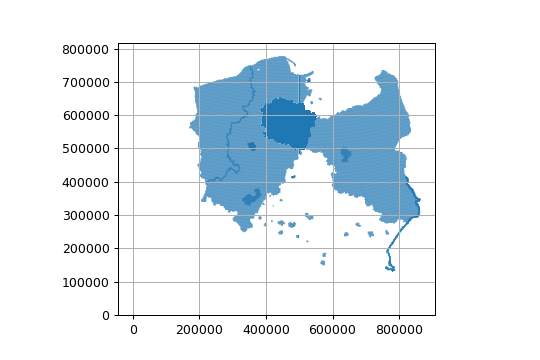

In [113]:
wybrany_df.plot()
plt.show()

In [114]:
wybrany_df['piksel'].hist(bins=wybrany_df['piksel'].unique().size)
wybrany_df['piksel'].value_counts()
# plt.show()

0.25    43546
0.05     9856
0.10     1561
Name: piksel, dtype: int64

In [115]:
wybrany_df[['piksel', 'uklad_xy']].value_counts(['piksel', 'uklad_xy'])

piksel  uklad_xy  
0.25    PL-1992       43546
0.05    PL-2000:S6     8754
        PL-2000:S7     1102
0.10    PL-2000:S6      832
        PL-1992         729
dtype: int64

# BDOT TESTY

In [116]:
f_bdot = r"C:\SEM6\SISS\metadata\bdot\sk_bdot_wfs.gpkg"

In [117]:
bdot = gpd.read_file(f_bdot)
bdot['rok_aktu'] = bdot['Data_aktua'].str[0:4].astype(np.int64)

In [118]:
bdot

,TERYT,NAZWA_POWI,Data_aktua,URL_GML,URL_SHP,geometry
0,0401,powiat aleksandrowski,2022-09-23 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((479128.782 559152.472, 479134...."
1,0214,powiat oleśnicki,2023-01-16 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((385388.513 390304.639, 385430...."
2,0462,powiat Grudziądz,2023-01-24 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((482651.775 617334.301, 482648...."
3,0220,powiat trzebnicki,2022-10-05 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((365680.148 367981.478, 365632...."
4,0265,powiat Wałbrzych,2023-01-19 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((306923.077 320137.265, 306913...."
...,...,...,...,...,...,...
375,0464,powiat Włocławek,2022-10-10 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((509546.223 529291.391, 509516...."
376,3031,powiat złotowski,2023-03-09 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((385311.873 631634.196, 385349...."
377,0413,powiat sępoleński,2022-10-27 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((384997.245 615178.269, 385170...."
378,3019,powiat pilski,2022-12-08 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((342585.530 579834.380, 342632...."


In [119]:
# bdot.value_counts()  # wywala sie przez multipoligony

In [120]:
bdot.describe()

d:\semestr3\wzgw\wzgw_env\lib\site-packages\pandas\core\dtypes\cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
d:\semestr3\wzgw\wzgw_env\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
d:\semestr3\wzgw\wzgw_env\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
d:\semestr3\wzgw\wzgw_env\lib\si

,TERYT,NAZWA_POWI,Data_aktua,URL_GML,URL_SHP,geometry
count,380,380,380,380,380,380
unique,380,370,83,380,380,380
top,0401,powiat średzki,2023-01-19 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"(POLYGON ((479128.781812 559152.471947, 479134..."
freq,1,2,22,1,1,1


In [121]:
bdot.groupby('TERYT')['NAZWA_POWI'].unique()

TERYT
0201     [powiat bolesławiecki]
0202    [powiat dzierżoniowski]
0203         [powiat głogowski]
0204          [powiat górowski]
0205          [powiat jaworski]
                 ...           
3217           [powiat wałecki]
3218           [powiat łobeski]
3261          [powiat Koszalin]
3262          [powiat Szczecin]
3263       [powiat Świnoujście]
Name: NAZWA_POWI, Length: 380, dtype: object

In [122]:
bdot[bdot.duplicated(['NAZWA_POWI'], keep=False)].sort_values('NAZWA_POWI', ascending=False)

,TERYT,NAZWA_POWI,Data_aktua,URL_GML,URL_SHP,geometry
49,0617,powiat świdnicki,2022-07-05 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((759551.172 380792.027, 759554...."
252,0219,powiat świdnicki,2022-08-03 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((303548.256 353247.525, 303549...."
208,0218,powiat średzki,2023-01-19 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((325175.889 376263.038, 325279...."
251,3025,powiat średzki,2023-01-09 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((394117.803 464090.388, 394140...."
21,0618,powiat tomaszowski,2021-10-20 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((823834.320 274964.749, 823776...."
100,1016,powiat tomaszowski,2023-03-15 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/10/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((567462.833 396513.089, 567254...."
259,3017,powiat ostrowski,2022-06-01 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((432021.478 430087.762, 432103...."
361,1416,powiat ostrowski,2022-12-05 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/14/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((707459.439 539728.824, 707426...."
44,0612,powiat opolski,2021-11-29 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((696002.052 376874.084, 696001...."
257,1609,powiat opolski,2023-02-09 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/16/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((430761.880 343840.032, 430840...."


# ŁĄCZENIE - INTERSECTION / UNION / SJOIN

In [127]:
bdot.intersection(wybrany_df)

d:\semestr3\wzgw\wzgw_env\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
d:\semestr3\wzgw\wzgw_env\lib\site-packages\pygeos\set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


0        POLYGON EMPTY
1        POLYGON EMPTY
2        POLYGON EMPTY
3        POLYGON EMPTY
4        POLYGON EMPTY
             ...      
54958             None
54959             None
54960             None
54961             None
54962             None
Length: 54963, dtype: geometry

<IPython.core.display.Javascript object>


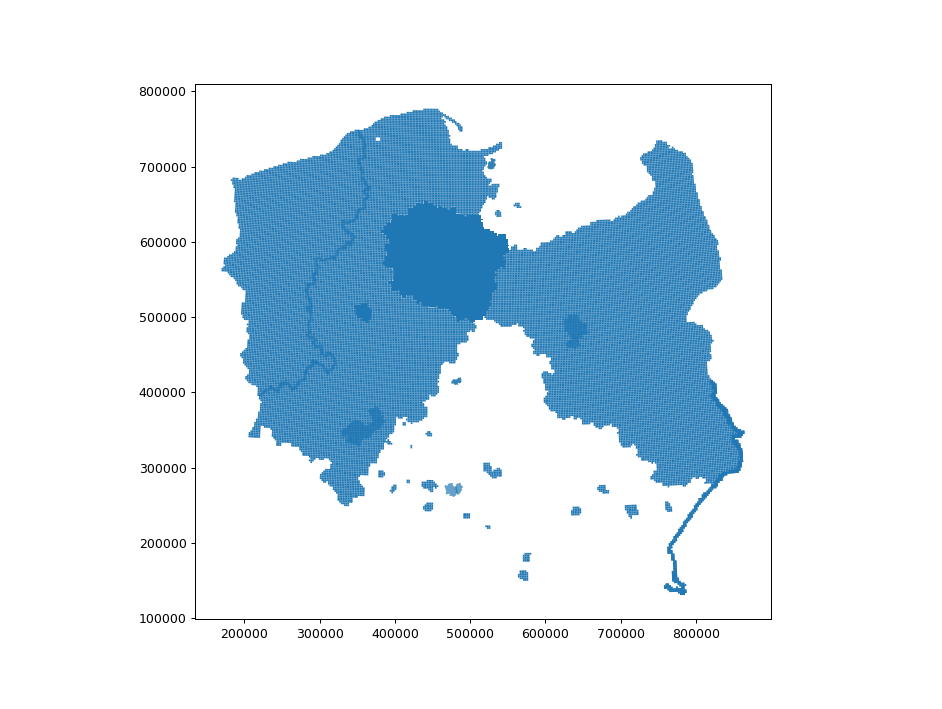

<AxesSubplot:>

In [130]:
wybrany_df.plot()

In [131]:
bdot.sjoin(wybrany_df, how="inner")

,TERYT,NAZWA_POWI,Data_aktua,URL_GML,URL_SHP,geometry,rok_aktu,index_right,gml_id,godlo,...,piksel,kolor,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB
0,0401,powiat aleksandrowski,2022-09-23 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((479128.782 559152.472, 479134....",2022,51308,SkorowidzOrtofomapy2020.938598,N-34-122-B-a-2-4,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.10.2020,2020-09-14,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,40
374,0418,powiat włocławski,2023-02-02 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((509546.223 529291.391, 509649....",2023,51308,SkorowidzOrtofomapy2020.938598,N-34-122-B-a-2-4,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.10.2020,2020-09-14,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,40
0,0401,powiat aleksandrowski,2022-09-23 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((479128.782 559152.472, 479134....",2022,50573,SkorowidzOrtofomapy2020.938597,N-34-122-B-a-2-3,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.10.2020,2020-09-14,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,33
188,0411,powiat radziejowski,2022-10-27 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((478234.638 538104.559, 478237....",2022,50573,SkorowidzOrtofomapy2020.938597,N-34-122-B-a-2-3,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.10.2020,2020-09-14,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,33
374,0418,powiat włocławski,2023-02-02 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((509546.223 529291.391, 509649....",2023,50573,SkorowidzOrtofomapy2020.938597,N-34-122-B-a-2-3,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.10.2020,2020-09-14,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,3019,powiat pilski,2022-12-08 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((342585.530 579834.380, 342632....",2022,24098,SkorowidzOrtofomapy2020.914428,N-33-107-B-a-2-1,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.014.2020,2020-04-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,47
378,3019,powiat pilski,2022-12-08 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((342585.530 579834.380, 342632....",2022,24982,SkorowidzOrtofomapy2020.914425,N-33-107-B-a-1-2,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.014.2020,2020-04-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,50
378,3019,powiat pilski,2022-12-08 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((342585.530 579834.380, 342632....",2022,24089,SkorowidzOrtofomapy2020.914438,N-33-107-B-b-3-3,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.014.2020,2020-04-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,34
378,3019,powiat pilski,2022-12-08 00:00:00,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((342585.530 579834.380, 342632....",2022,23391,SkorowidzOrtofomapy2020.914437,N-33-107-B-a-4-4,...,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.014.2020,2020-04-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,39
